In [49]:
from sunpy.net import Fido, attrs as a
from stixpy.net.client import STIXClient  # This registers the STIX client with Fido

ql_query = Fido.search(a.Time('2020-06-05', '2020-06-07'), a.Instrument.stix,
                    a.stix.DataProduct.ql_lightcurve)

In [50]:
ql_query

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
Time,Time,str4,str2,str2,str13,str3,str1
2020-06-05 00:00:00.000,2020-06-05 23:59:59.999,STIX,L1,QL,ql-lightcurve,V02,-
2020-06-06 00:00:00.000,2020-06-06 23:59:59.999,STIX,L1,QL,ql-lightcurve,V02,-
2020-06-07 00:00:00.000,2020-06-07 23:59:59.999,STIX,L1,QL,ql-lightcurve,V02,-


In [51]:
ql_files = Fido.fetch(ql_query)

Files Downloaded:   0%|          | 0/3 [00:00<?, ?file/s]

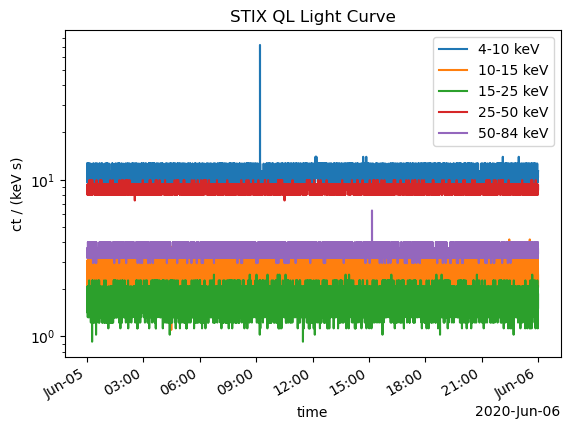

In [52]:
from datetime import datetime

from sunpy.timeseries import TimeSeries
from stixpy.timeseries import quicklook # This registers the STIX timeseries with sunpy

ql_lightcurves = TimeSeries(ql_files)
ql_lightcurves[0].peek()

In [5]:
from astropy.coordinates import SkyCoord
import astropy.units as u
from sunpy.coordinates import frames

coord = SkyCoord(45*u.deg, -60*u.deg, obstime="2024-09-03",
                 frame=frames.HeliographicStonyhurst)
coord


<SkyCoord (HeliographicStonyhurst: obstime=2024-09-03T00:00:00.000, rsun=695700.0 km): (lon, lat) in deg
    (45., -60.)>

In [6]:
from astropy.coordinates import SkyCoord
import astropy.units as u
from sunpy.coordinates import frames

coord = SkyCoord(70*u.deg, -30*u.deg, obstime="2024-09-03",
                 frame=frames.HeliographicStonyhurst)
coord
coord.transform_to(frames.Helioprojective(observer="earth"))


<SkyCoord (Helioprojective: obstime=2024-09-03T00:00:00.000, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate for 'earth'>): (Tx, Ty, distance) in (arcsec, arcsec, km)
    (774.6445871, -507.61630701, 1.50752121e+08)>

In [11]:
from astropy.coordinates import SkyCoord
import astropy.units as u
from sunpy.coordinates import frames

coord = SkyCoord(70*u.deg, -30*u.deg, obstime="2024-09-03",
                 frame=frames.HeliographicStonyhurst)



coord.transform_to('icrs')


<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, km)
    (182.3483819, -31.33544304, 752668.93009793)>

In [13]:
hpc = SkyCoord(0*u.arcsec, 0*u.arcsec, observer="earth",

                obstime="2017-07-26",

                frame=frames.Helioprojective)


<SkyCoord (Helioprojective: obstime=2017-07-26T00:00:00.000, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate for 'earth'>): (Tx, Ty) in arcsec
    (0., 0.)>

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

AIA20110607_063302_0171_lowres.fits:   0%|          | 0.00/973k [00:00<?, ?B/s]

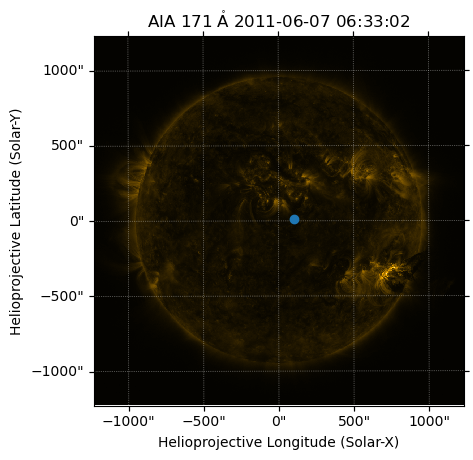

In [14]:
import warnings

from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.io.fits.verify import VerifyWarning

import sunpy.map
from sunpy.data.sample import AIA_171_IMAGE  

with warnings.catch_warnings():  
    warnings.simplefilter("ignore", category=VerifyWarning)
    amap = sunpy.map.Map(AIA_171_IMAGE)
amap.coordinate_frame  
coord = SkyCoord(100 * u.arcsec, 10*u.arcsec, frame=amap.coordinate_frame)  
coord  
pixels = amap.wcs.world_to_pixel(coord)  
pixels  
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(projection=amap)  
amap.plot()  
ax.plot_coord(coord, 'o')  

In [15]:
from sunpy.net import Fido, attrs as a
print(Fido)

sunpy.net.Fido

Fido is a unified data search and retrieval tool.

It provides simultaneous access to a variety of online data sources, some
cover multiple instruments and data products like the Virtual Solar
Observatory and some are specific to a single source.

For details of using `~sunpy.net.Fido` see :ref:`sunpy-tutorial-acquiring-data-index`.


      Client      ...
----------------- ...
CDAWEBClient      ...
ADAPTClient       ...
EVEClient         ...
GBMClient         ...
XRSClient         ...
SUVIClient        ...
GONGClient        ...
LYRAClient        ...
NOAAIndicesClient ...
NOAAPredictClient ...
SRSClient         ...
NoRHClient        ...
RHESSIClient      ...
HEKClient         ...
HECClient         ...
JSOCClient        ...
VSOClient         ...


In [21]:
from sunpy.net import Fido, attrs as a

a.Time('2012/3/4', '2012/3/6')
result = Fido.search(a.Time('2012/3/4', '2012/3/6'), a.Instrument.lyra, a.Level.two) 
print(result)  




Results from 1 Provider:

3 Results from the LYRAClient:
Source: http://proba2.oma.be/lyra/data/bsd

       Start Time               End Time        Instrument  Physobs   Source Provider Level
----------------------- ----------------------- ---------- ---------- ------ -------- -----
2012-03-04 00:00:00.000 2012-03-04 23:59:59.999       LYRA irradiance PROBA2      ESA     2
2012-03-05 00:00:00.000 2012-03-05 23:59:59.999       LYRA irradiance PROBA2      ESA     2
2012-03-06 00:00:00.000 2012-03-06 23:59:59.999       LYRA irradiance PROBA2      ESA     2




In [23]:
from sunpy.net import Fido, attrs as a  #importing search tools
import astropy.units as u

result = Fido.search(
    a.Time("2022-06-01", "2022-06-01T01:00:00"),  # Time range
    a.Instrument("AIA"),  # SDO AIA Instrument
    a.Wavelength(171 * u.angstrom)  # 171 Å wavelength
)

print(result)  # Displays the search results


Results from 1 Provider:

300 Results from the VSOClient:
Source: https://sdac.virtualsolar.org/cgi/search
Total estimated size: 20.337 Gbyte

       Start Time               End Time        Source Instrument   Wavelength   Provider  Physobs  Wavetype Extent Width Extent Length Extent Type   Size  
                                                                     Angstrom                                                                        Mibyte 
----------------------- ----------------------- ------ ---------- -------------- -------- --------- -------- ------------ ------------- ----------- --------
2022-06-01 00:00:09.000 2022-06-01 00:00:10.000    SDO        AIA 171.0 .. 171.0     JSOC intensity   NARROW         4096          4096    FULLDISK 64.64844
2022-06-01 00:00:21.000 2022-06-01 00:00:22.000    SDO        AIA 171.0 .. 171.0     JSOC intensity   NARROW         4096          4096    FULLDISK 64.64844
2022-06-01 00:00:33.000 2022-06-01 00:00:34.000    SDO        AIA 171.0 

In [25]:
from sunpy.net import Fido, attrs as a
import astropy.units as u
import sunpy.map
import matplotlib.pyplot as plt

# Define time range for solar flare observation
start_time = "2022-09-10T00:00:00"
end_time = "2022-09-10T23:59:59"

# Query for GOES/XRS (Soft X-rays) and STIX (Hard X-rays)
results = Fido.search(
    a.Time(start_time, end_time), 
    (a.Instrument("XRS") & a.Wavelength(0.1*u.nm, 0.8*u.nm)) |  # GOES Soft X-rays (1-8 Å)
    (a.Instrument("STIX") & a.Wavelength(4*u.keV, 150*u.keV))   # STIX Hard X-rays
)

print("Available datasets:\n", results)

# Select one dataset to download (e.g., STIX)
files = Fido.fetch(results[1])  # Download STIX data
print("Downloaded Files:\n", files)

# Load the first STIX file into a SunPy Map
flare_map = sunpy.map.Map(files[0])

# Convert to Heliocentric coordinates
heliocentric_coords = flare_map.coordinate_frame
print("Heliocentric Coordinates:\n", heliocentric_coords)

# 🌞 **Visualizing the STIX Data Projection**
fig = plt.figure()
ax = plt.subplot(projection=flare_map)
flare_map.plot()
plt.title(f"Solar Flare Projection ({start_time})")

# Show plot
plt.show()


Available datasets:
 Results from 0 Providers:




IndexError: list index out of range

In [ ]:
from sunpy.net import Fido, attrs as a
import astropy.units as u
import sunpy.map
import matplotlib.pyplot as plt

# Define time range for solar flare observation
start_time = "2018-09-10T00:00:00"
end_time = "2022-09-10T23:59:59"

# Query for GOES/XRS (Soft X-rays) and STIX (Hard X-rays)
results = Fido.search(
    a.Time(start_time, end_time), 
    (a.Instrument("XRS") & a.Wavelength(0.1*u.nm, 0.8*u.nm)) |  # GOES Soft X-rays (1-8 Å)
    (a.Instrument("STIX") & a.Wavelength(4*u.keV, 150*u.keV))   # STIX Hard X-rays
)

print("Available datasets:\n", results)

Available datasets:
 Results from 0 Providers:




In [32]:
from sunpy.net import Fido, attrs as a
from stixpy.net.client import STIXClient
import astropy.units as u
import sunpy.map
import matplotlib.pyplot as plt

# Define time range for solar flare observation
start_time = "2020-06-05T00:00:00"
end_time = "2020-06-06T23:59:59"

# Query for GOES/XRS (Soft X-rays) and STIX (Hard X-rays)
results = Fido.search(
    a.Time(start_time, end_time), 
    (a.Instrument.xrs)|  # GOES Soft X-rays (1-8 Å)
    (a.Instrument.stix, a.stix.DataProduct.ql_lightcurve)   # STIX Hard X-rays
)

print("Available datasets:\n", results)

TypeError: unsupported operand type(s) for &: 'tuple' and 'Time'

In [38]:
from sunpy.net import Fido, attrs as a
from stixpy.net.client import STIXClient
import astropy.units as u
import sunpy.map
import matplotlib.pyplot as plt

# Define time range for solar flare observation
start_time = "2020-06-05"
end_time = "2020-06-07"

# Query for GOES/XRS (Soft X-rays) and STIX (Hard X-rays)
results = Fido.search(
    a.Time(start_time, end_time), 
    a.Instrument.stix,
    a.stix.DataProduct.ql_lightcurve   # STIX Hard X-rays
)

print("Available datasets:\n", results)

Available datasets:
 Results from 1 Provider:

3 Results from the STIXClient:

       Start Time               End Time        Instrument Level DataType  DataProduct  Ver Request ID
----------------------- ----------------------- ---------- ----- -------- ------------- --- ----------
2020-06-05 00:00:00.000 2020-06-05 23:59:59.999       STIX    L1       QL ql-lightcurve V02          -
2020-06-06 00:00:00.000 2020-06-06 23:59:59.999       STIX    L1       QL ql-lightcurve V02          -
2020-06-07 00:00:00.000 2020-06-07 23:59:59.999       STIX    L1       QL ql-lightcurve V02          -




In [39]:
ql_files = Fido.fetch(results)

Files Downloaded:   0%|          | 0/3 [00:00<?, ?file/s]

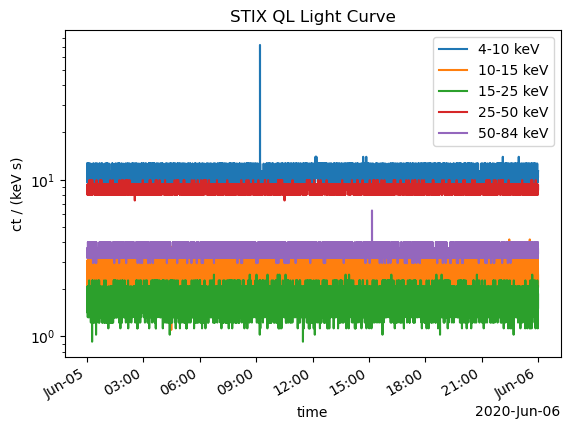

In [40]:
from datetime import datetime

from sunpy.timeseries import TimeSeries
from stixpy.timeseries import quicklook # This registers the STIX timeseries with sunpy

ql_lightcurves = TimeSeries(ql_files)
ql_lightcurves[0].peek()


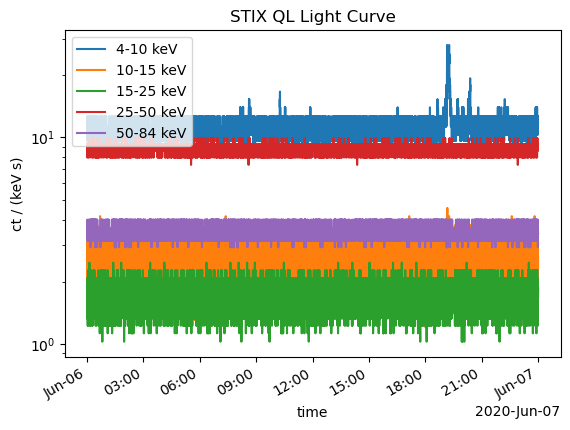

In [42]:
from datetime import datetime

from sunpy.timeseries import TimeSeries
from stixpy.timeseries import quicklook # This registers the STIX timeseries with sunpy

ql_lightcurves = TimeSeries(ql_files)
ql_lightcurves[1].peek()

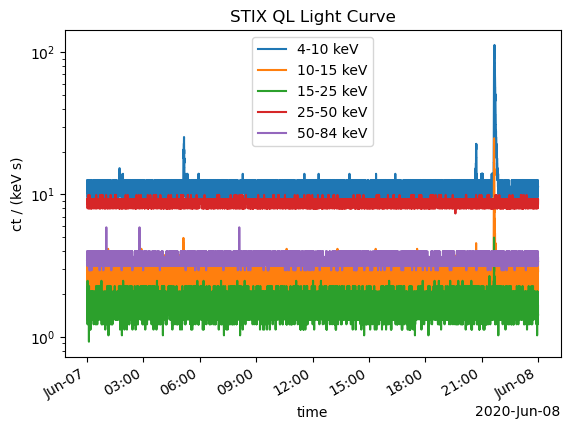

In [44]:
from datetime import datetime

from sunpy.timeseries import TimeSeries
from stixpy.timeseries import quicklook # This registers the STIX timeseries with sunpy

ql_lightcurves = TimeSeries(ql_files)
ql_lightcurves[2].peek()

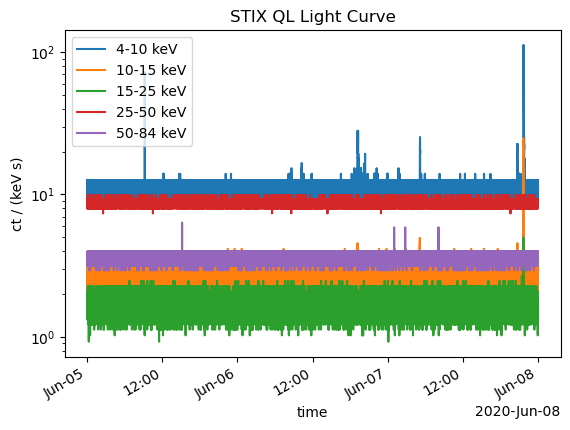

In [45]:
combined_ts = ql_lightcurves[0]
for lc in ql_lightcurves[1:]:
    combined_ts = combined_ts.concatenate(lc)

combined_ts.peek()


In [48]:
from sunpy.net import Fido, attrs as a
import astropy.units as u
from sunpy.timeseries import TimeSeries
import matplotlib.pyplot as plt

# Define time range for solar flare observation
start_time = "2020-06-05"
end_time = "2020-06-07"

# Search for STIX Quicklook data
results = Fido.search(
    a.Time(start_time, end_time), 
    a.Instrument.stix,
    a.Level("QL")  # Quicklook Data
)

print("STIX Data Available:\n", results)

# Download STIX data
ql_files = Fido.fetch(results[0])  # Download files
print("Downloaded Files:\n", ql_files)

# Load STIX Quicklook Data into a TimeSeries
ql_lightcurves = TimeSeries(ql_files)

# Combine all timeseries into one
combined_ts = ql_lightcurves[0]
for lc in ql_lightcurves[1:]:
    combined_ts = combined_ts.concatenate(lc)

# Plot the merged STIX lightcurve
combined_ts.peek()

# Optional: Customize the Plot
plt.title(f"STIX X-ray Lightcurve ({start_time} - {end_time})")
plt.xlabel("Time")
plt.ylabel("X-ray Flux")
plt.show()


STIX Data Available:
 Results from 0 Providers:




IndexError: list index out of range

In [91]:
import astropy.units as u
length = 1 * u.nm
length
#l=length.to(u.pm)
#length.value
#l.si
#l.unit
length.to(u.keV, equivalencies=u.spectral())

<Quantity 1.23984198 keV>

In [74]:
distance_start = 10 * u.mm
distance_end = 23 * u.km
displacement = distance_end - distance_start
displacement

time = 15 * u.minute
speed = displacement / time
speed

<Quantity 1.53333267 km / min>